In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('../data/train_df_cleaned.csv')

In [3]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinChar,CabinNum,firstName,secondName
0,1,1,1.0,38.355472,2,0,10.0,27.14,2.0,2.0,12239,1311.0,14195.0
1,0,3,1.0,38.355472,0,0,17.0,13.35,2.0,2.0,-1,1015.0,2495.0
2,0,3,1.0,0.330000,1,2,96.0,71.29,2.0,1.0,-1,2010.0,14478.0
3,0,3,1.0,19.000000,0,0,90.0,13.04,2.0,1.0,-1,1662.0,10435.0
4,1,3,1.0,25.000000,0,0,32.0,7.76,2.0,0.0,-1,2678.0,1902.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2,0.0,62.000000,0,0,101.0,14.86,0.0,3.0,17243,18.0,1301.0
99996,0,2,1.0,66.000000,0,0,3.0,11.15,2.0,3.0,-1,1507.0,2436.0
99997,0,3,1.0,37.000000,0,0,101.0,9.95,2.0,1.0,-1,610.0,3463.0
99998,0,3,1.0,51.000000,0,1,35.0,30.92,2.0,1.0,-1,3636.0,3226.0


**Prepare data**

In [4]:
X, y = df.drop(['Survived'], axis=1), df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
fr = RandomForestClassifier()
fr.fit(X_train, y_train)

RandomForestClassifier()

In [6]:
print(f'Train score: {round(fr.score(X_train, y_train), 2) * 100}%')
print(f'Test score: {round(fr.score(X_test, y_test), 2) * 100}%')

Train score: 100.0%
Test score: 77.0%


In [7]:
y_pred = fr.predict(X_test)

**Evaluation**

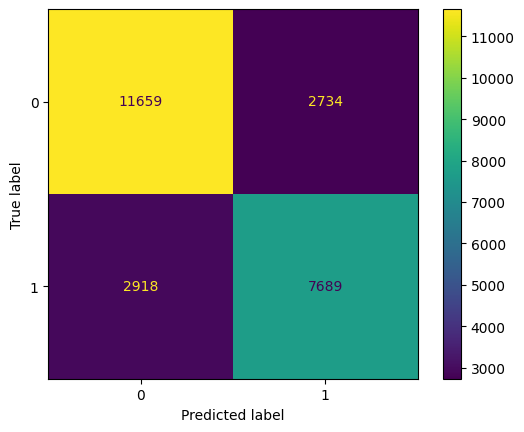

In [8]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot();

In [9]:
class_report = classification_report(y_test, y_pred)

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81     14393
           1       0.74      0.72      0.73     10607

    accuracy                           0.77     25000
   macro avg       0.77      0.77      0.77     25000
weighted avg       0.77      0.77      0.77     25000



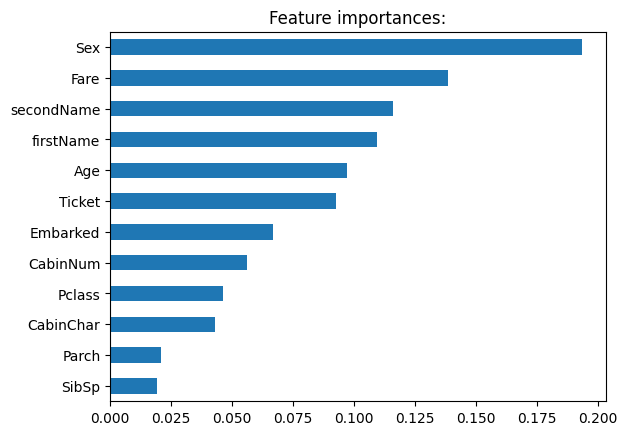

In [9]:
pd.Series(fr.feature_importances_, index=X_train.columns).sort_values().plot(kind='barh', title='Feature importances:');